# Heart Attack Prediction with classification
## Features explained
* Age
* Sex
* exng - exercise induced angina (1 = yes; 0 = no)
* ca - number of major vessels (0-3)
* cp - Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps - resting blood pressure (in mm Hg)
* chol - cholestoral in mg/dl fetched via BMI sensor
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg - resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions
    and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular
    hypertrophy by Estes' criteria
* thalach - maximum heart rate achieved
* oldpeak - Previous peak
* slp - slope the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
* caa - Number of major vessels
* thall - Thalium stress result ~(0,3)
* target - 0= less chance of heart attack 1= more chance of heart attack

## Dataset analysis results

### Correlations
**Positiv correlations**
* thalachh - output = 0.4
* thalachh - slp = 0.4
* cp - output = 0.4

**negativ correlations**
* oldpeak - slp = -0.6
* thalachh - age = -0.4
* cp - exng = -0.4
* exng - thalachh = -0.4

In [11]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [12]:
heart_data = pd.read_csv("./heart_attack/dataset/heart.csv")
saturation_data = pd.read_csv("./heart_attack/dataset/o2Saturation.csv")

In [13]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
heart_data["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [14]:
corr = heart_data["age"].corr(heart_data["cp"])

In [15]:
corr_all = heart_data.corr()


In [16]:
round(corr_all,2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trtbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalachh,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exng,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


<Axes: >

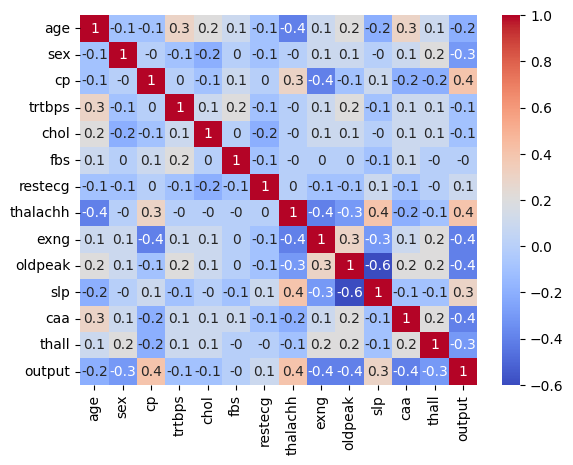

In [20]:
sns.heatmap(round(corr_all,1), annot=True, cmap="coolwarm")

<Axes: xlabel='age', ylabel='thalachh'>

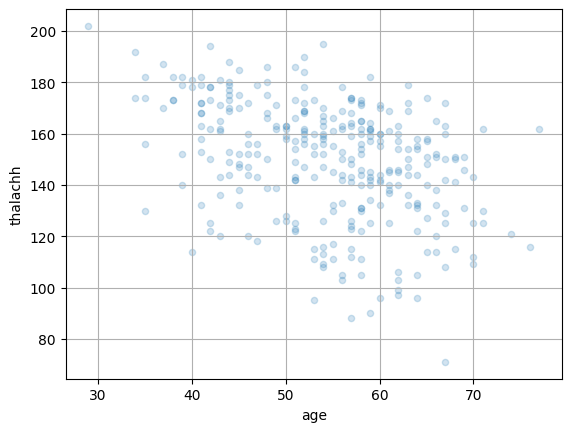

In [21]:
heart_data.plot(kind="scatter", x="age", y="thalachh", grid=True,alpha=0.2)

<Axes: xlabel='oldpeak', ylabel='slp'>

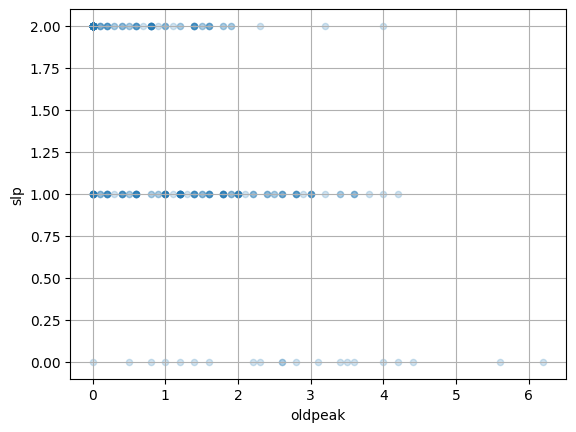

In [22]:
heart_data.plot(kind="scatter", x="oldpeak", y="slp", grid=True,alpha=0.2)

In [23]:
corr_matrix =heart_data.corr()

In [24]:
corr_matrix["age"].sort_values(ascending=False)

age         1.000000
trtbps      0.279351
caa         0.276326
chol        0.213678
oldpeak     0.210013
fbs         0.121308
exng        0.096801
thall       0.068001
cp         -0.068653
sex        -0.098447
restecg    -0.116211
slp        -0.168814
output     -0.225439
thalachh   -0.398522
Name: age, dtype: float64

In [26]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slp', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='chol'>,
        <Axes: xlabel='chol', ylabel='chol'>,
        <Axes: xlabel='oldpeak', ylabel='chol'>,
        <Axes: xlabel='slp', ylabel='chol'>,
        <Axes: xlabel='cp', ylabel='chol'>],
       [<Axes: xlabel='age', ylabel='oldpeak'>,
        <Axes: xlabel='chol', ylabel='oldpeak'>,
        <Axes: xlabel='oldpeak', ylabel='oldpeak'>,
        <Axes: xlabel='slp', ylabel='oldpeak'>,
        <Axes: xlabel='cp', ylabel='oldpeak'>],
       [<Axes: xlabel='age', ylabel='slp'>,
        <Axes: xlabel='chol', ylabel='slp'>,
        <Axes: xlabel='oldpeak', ylabel='slp'>,
        <Axes: xlabel='slp', ylabel='slp'>,
        <Axes: xlabel='cp', ylabel='slp'>],
       [<Axes: xlabel='age', ylabel='cp'>,
        <Axes: xlabel='chol', yl

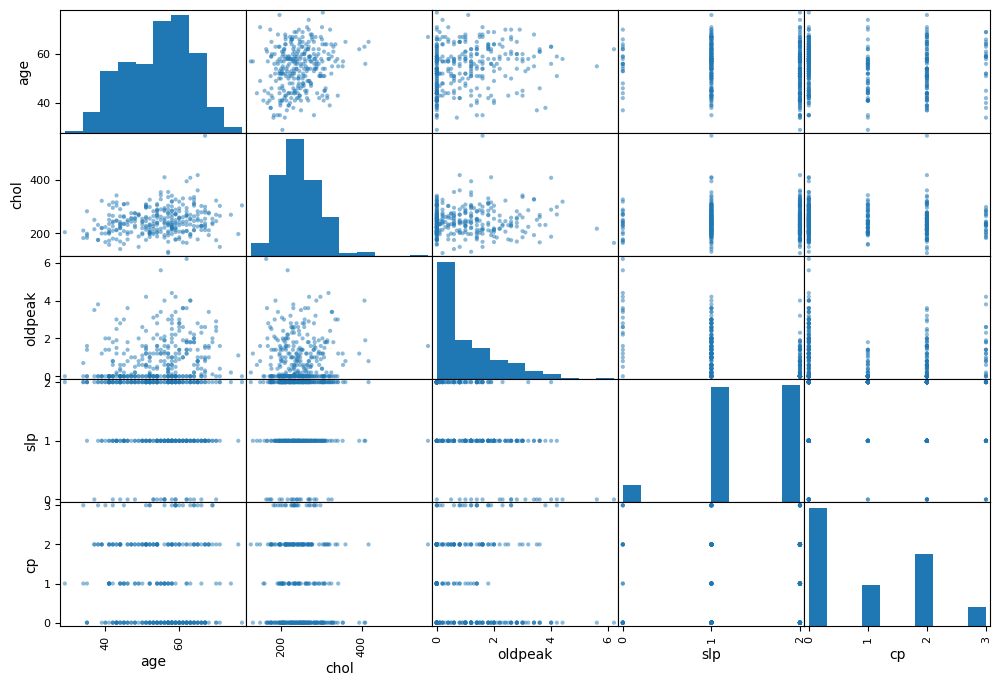

In [27]:
attributes = ["age","chol","oldpeak", "slp", "cp"]
scatter_matrix(heart_data[attributes], figsize=(12,8))

<Axes: xlabel='cp', ylabel='count'>

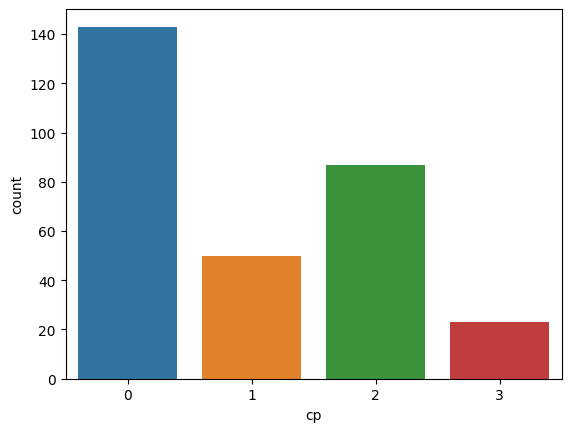

In [28]:
sns.countplot(data=heart_data, x="cp")

In [30]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
X = heart_data.drop("output", axis=1)

In [32]:
X.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [16]:
y = heart_data["output"]

In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

## Normalization (feature scaling)

In [58]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

In [64]:
scaled_heart_data= heart_data.copy(deep=True)

In [65]:
scaled_heart_data_labels = scaled_heart_data["output"]
scaled_heart_data = scaled_heart_data.drop("output", axis=1)

In [61]:
scaled_heart_data_train, scaled_heart_data_test, scaled_heart_data_labels_train, scaled_heart_data_labels_test = train_test_split(scaled_heart_data,scaled_heart_data_labels, test_size=0.2, random_state=42)

In [66]:
scaled_heart_data_labels

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [55]:
scaled_heart_data = min_max_scaler.fit_transform(scaled_heart_data)

In [57]:
scaled_heart_data

array([[ 0.41666667,  1.        ,  1.        , ..., -1.        ,
        -0.33333333,  1.        ],
       [-0.66666667,  1.        ,  0.33333333, ..., -1.        ,
         0.33333333,  1.        ],
       [-0.5       , -1.        , -0.33333333, ..., -1.        ,
         0.33333333,  1.        ],
       ...,
       [ 0.625     ,  1.        , -1.        , ...,  0.        ,
         1.        , -1.        ],
       [ 0.16666667,  1.        , -1.        , ..., -0.5       ,
         1.        , -1.        ],
       [ 0.16666667, -1.        , -0.33333333, ..., -0.5       ,
         0.33333333, -1.        ]])

In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [26]:
X_train.shape

(242, 13)

In [38]:
X_test.shape

(61, 13)

In [40]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,y_train)

In [41]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [42]:
y_test[:5]

179    0
228    0
111    1
246    0
60     1
Name: output, dtype: int64

In [43]:
score = clf.score(X_test,y_test)

In [44]:
score

0.8852459016393442

In [46]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma="auto", max_iter=1000, random_state=42))

In [47]:
clf2 = clf2.fit(X_train,y_train)

In [48]:
clf2.score(X_test,y_test)

0.8688524590163934

In [50]:
clf3 = SGDClassifier(random_state=42)
clf3 = clf3.fit(X_train, y_train)

In [51]:
clf3.score(X_test,y_test)

0.4918032786885246

In [8]:
cross_val_score(clf4, X, y, cv=3, scoring="accuracy")

NameError: name 'X' is not defined

In [7]:
clf4 = LogisticRegression(random_state=0, max_iter=1000)

## Information Gain for feature selection

### from sklearn.feature_selection import mutual_info_classif

In [18]:
importances = mutual_info_classif(X,y)

In [20]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [21]:
feat_importances = pd.Series(importances, heart_data.columns[0:len(heart_data.columns)-1])

<Axes: >

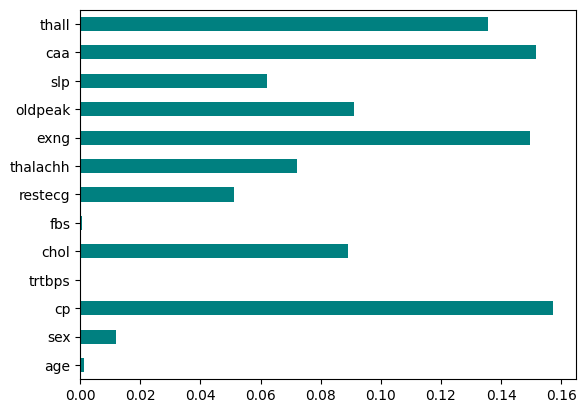

In [22]:
feat_importances.plot(kind="barh", color = "teal")

In [33]:
selected_X = X.drop(["fbs","trtbps","age"],axis=1)

In [23]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
mod = []
cv_score=[]
model =[LogisticRegression(max_iter=1500),AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X, y, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
6,KNeighborsClassifier(),0.643880
5,ExtraTreeClassifier(),0.732732
4,DecisionTreeClassifier(),0.748962
2,BaggingClassifier(),0.768907
1,AdaBoostClassifier(),0.785137
3,GradientBoostingClassifier(),0.804973
0,LogisticRegression(max_iter=1500),0.828251


In [42]:
mod = []
cv_score=[]
model =[LogisticRegression(max_iter=1500),AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, selected_X, y, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
6,KNeighborsClassifier(),0.656831
5,ExtraTreeClassifier(),0.748962
2,BaggingClassifier(),0.778634
4,DecisionTreeClassifier(),0.778743
1,AdaBoostClassifier(),0.814918
3,GradientBoostingClassifier(),0.818415
0,LogisticRegression(max_iter=1500),0.848087


In [41]:
y.value_counts() / len(y)

output
1    0.544554
0    0.455446
Name: count, dtype: float64